##These steps are to setup colab to deal with kaggle datasets




In [93]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ibrahimabido","key":"1d10857b54dd4d6f1ebe135897616be3"}'}

In [94]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [95]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 68 Mar 31 07:53 kaggle.json
{"username":"ibrahimabido","key":"1d10857b54dd4d6f1ebe135897616be3"}

In [96]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          21910  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          16286  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          18280  
lava18/google-play-store-apps                                Google Play Store Apps                                2MB  2019-02-03 13:55:47          45824  
bigquery/crypto-ethereum-classic                          

In [97]:
!kaggle competitions list

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                   2030-01-01 00:00:00  Getting Started  Knowledge       2584           False  
titanic                                            2030-01-01 00:00:00  Getting Started  Knowledge      10469           False  
house-prices-advanced-regression-techniques        2030-01-01 00:00:00  Getting Started  Knowledge       4327           False  
imagenet-object-localization-challenge             2029-12-31 07:00:00  Research         Knowledge         36           False  
competitive-data-science-predict-future-sales      2019-12-31 23:59:00  Playground           Kudos       2633           False  
two-sigma-financial-news                           2019-07-15 23:59:00  Featured          $100,000      

In [98]:
!ls

 gdrive  'kaggle (1).json'   kaggle.json   sample_data


In [99]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [100]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 68 Mar 31 07:53 kaggle.json
{"username":"ibrahimabido","key":"1d10857b54dd4d6f1ebe135897616be3"}

In [101]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/.kaggle/kaggle.json': No such file or directory


In [102]:
!cp /content/.kaggle/kaggle.json ~/root/.kaggle/kaggle.json

cp: cannot stat '/content/.kaggle/kaggle.json': No such file or directory


In [103]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


##Importing the necessary packages

In [0]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import imutils
import cv2

import random
import os,shutil
from keras.preprocessing import image
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import cv2
from PIL import Image



Downloading and unzipping dataset

In [105]:
!kaggle competitions download -c dogs-vs-cats -p /content/gdrive/My\ Drive/kaggle/dogs-vs-cats

sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [106]:
#cd gdrive/My\ Drive/kaggle/dogs-vs-cats  #change dir
!mkdir gdrive/My\ Drive/kaggle/dogs-vs-cats/train  #create a directory named train/
!mkdir gdrive/My\ Drive/kaggle/dogs-vs-cats/test  #create a directory named test/
!unzip gdrive/My\ Drive/kaggle/dogs-vs-cats/train.zip -d gdrive/My\ Drive/kaggle/dogs-vs-cats/train/  #unzip data in train/
!unzip gdrive/My\ Drive/kaggle/dogs-vs-cats/test1.zip -d gdrive/My\ Drive/kaggle/dogs-vs-cats/test/  #unzip data in test/


Output hidden; open in https://colab.research.google.com to view.

Labeling train data

In [0]:
filenames = os.listdir("gdrive/My Drive/kaggle/dogs-vs-cats/train/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [108]:
df.head()

category       filename
0         1  dog.12165.jpg
1         1   dog.4091.jpg
2         0   cat.6046.jpg
3         0   cat.3400.jpg
4         0   cat.1777.jpg

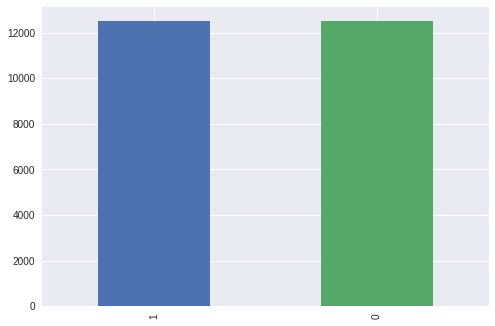

In [109]:
df['category'].value_counts().plot.bar()

##Veiw a sample picture

In [110]:
sample = random.choice(filenames)
trainPath="gdrive/My Drive/kaggle/dogs-vs-cats/train/train/"
im = image.load_img(trainPath+sample)
plt.imshow(im)


##Training

In [0]:
filenames = os.listdir("gdrive/My Drive/kaggle/dogs-vs-cats/train/train")
raws = []
for filename in filenames:
    im = cv2.imread(trainPath+filename) # Can be many different formats.
    im=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im=cv2.resize(im,(32,32))
    imArr=im.flatten()
    raws.append(imArr)

In [112]:
len(raws[0])

1024

##Converting test data to arrays

In [0]:
testPath="gdrive/My Drive/kaggle/dogs-vs-cats/test/test1/"
filenames = os.listdir("gdrive/My Drive/kaggle/dogs-vs-cats/test/test1")
testRaws = []
for filename in filenames:
    im = cv2.imread(testPath+filename) # Can be many different formats.
    im=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im=cv2.resize(im,(32,32))
    imArr=im.flatten()
    testRaws.append(imArr)

In [0]:
knn=KNeighborsClassifier(n_neighbors=8).fit(raws,df['category'])
predictions=knn.predict(testRaws)


In [115]:
testRaws[0]

array([ 73,  71,  77, ..., 116, 155, 180], dtype=uint8)

In [116]:
len(predictions)

12500

##Veiw result for random sample
you can run this cell many times to show the result for different samples

In [0]:
from sklearn.metrics import accuracy_score

This a Dog


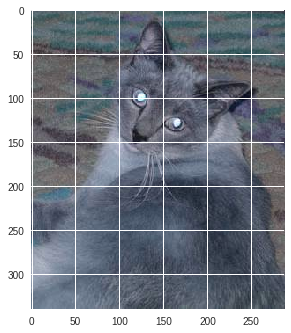

In [118]:
sample = random.choice(filenames)
testPath="gdrive/My Drive/kaggle/dogs-vs-cats/test/test1/"
im = cv2.imread(testPath+sample)
#im = cv2.imread(testPath+"100.jpg")
plt.imshow(im)

im=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im=cv2.resize(im,(32,32))
imArr=im.flatten()
pred=knn.predict(imArr.reshape(1, -1))
if pred==0:
  print("This a Cat")
else:
  print("This a Dog")

##Now I will Implement my own KNN classifier


In [0]:
import csv
import random
import math
import operator
#from collections import counter 
 
class KNNClass:
    def __init__(self, k):
        self.k=k
    
    def euclDist(self,instance1, instance2, length):
        distance = 0
        for x in range(length):
            distance += pow((instance1[x] - instance2[x]), 2)
        return math.sqrt(distance)
    
    def getNeighbors(self,trainSet,trainLabels, testInstance):
        distances = []
        length = len(testInstance)-1
        l = len(trainLabels)
        for x in range(l):
            dist = self.euclDist(testInstance, trainSet[x], length)
            trainSet[x].append(trainLabels[x])
            distances.append((trainSet[x], dist))
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
        for x in range(self.k):
            neighbors.append(distances[x][0])
        return neighbors
    
    def predict(self,neighbors):
        classVotes = {}
        for x in range(len(neighbors)):
            response = neighbors[x][-1]
            if response in classVotes:
                classVotes[response] += 1
            else:
                classVotes[response] = 1
    #classVotes
        zipped=zip(classVotes.values(),classVotes.keys())
        sortedV=sorted(zipped,reverse=True)
        return sortedV[0][1]
 



In [120]:
type(raws[0])

numpy.ndarray

In [121]:
type(testRaws[0])

numpy.ndarray

In [0]:
labels=np.array(df['category']).tolist()
rawsL=[l.tolist() for l in raws]
testRawsL=[l.tolist() for l in testRaws]

In [123]:
type(labels)

list

In [125]:
type(rawsL[0])

list

In [126]:
type(testRawsL[0])

list

In [0]:
sample = random.choice(filenames)
testPath="gdrive/My Drive/kaggle/dogs-vs-cats/test/test1/"
im = cv2.imread(testPath+sample)

im=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im=cv2.resize(im,(32,32))
imArr=im.flatten()

In [128]:
type(imArr)

numpy.ndarray

This a Cat


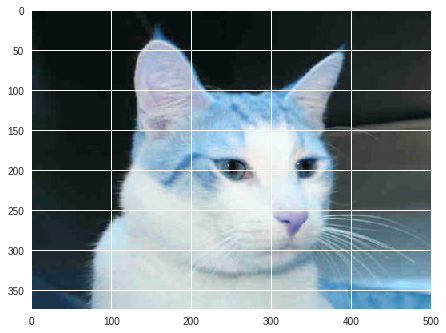

In [135]:
k=3
model=KNNClass(k)
sample = random.choice(filenames)
testPath="gdrive/My Drive/kaggle/dogs-vs-cats/test/test1/"
im = cv2.imread(testPath+sample)
#im = cv2.imread(testPath+"100.jpg")
plt.imshow(im)

im=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im=cv2.resize(im,(32,32))
imArr=im.flatten()
imArr=imArr.tolist()
neighbours = model.getNeighbors(rawsL,labels, imArr)
pred=model.predict(neighbours)
if pred==0:
  print("This a Cat")
else:
  print("This a Dog")